<a href="https://colab.research.google.com/github/Mahesha-uop/HealthGuardian-Disease-Risk-Detector-using-h2o-wave/blob/main/train/Diabetes_Risk_Prediction_H2O_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  default-jre default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
0 upgraded, 12 newly installed, 0 to remove and 35 not upgraded.
Need to get 3,720 kB of archives.
After this operation, 12.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 default-jre-headless amd64 2:1.11-72build2 [3,042 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:3 http://archive.ubuntu.com

In [2]:
# If using google drive to have the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Install h2o if haven't installed
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=c94279738ff7a53f77547828476bacb88d5aa19f0a30d5d1abcd2c4d9ffed93d
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [4]:
 # Import necessary libraries from h2o
 import h2o
 from h2o.automl import H2OAutoML

In [5]:
# Check instance of H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpc23tb3ae
  JVM stdout: /tmp/tmpc23tb3ae/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpc23tb3ae/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,2 months
H2O_cluster_name:,H2O_from_python_unknownUser_uzjhdz
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [6]:
# Import data in csv as a dataframe
file_path = '/content/drive/MyDrive/Machine Learning/H2O /diabetes.csv' # Give the file path. In my case google drive
Diabetes_details_df = h2o.import_file(file_path)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [7]:
# Recognize field in csv
Diabetes_details_df.types

{'Pregnancies': 'int',
 'Glucose': 'int',
 'BloodPressure': 'int',
 'SkinThickness': 'int',
 'Insulin': 'int',
 'BMI': 'real',
 'DiabetesPedigreeFunction': 'real',
 'Age': 'int',
 'Outcome': 'int'}

In [8]:
# Convert the column with 1, 0 to "Yes", "No"
Diabetes_details_df['Outcome'] = (Diabetes_details_df['Outcome'] == 1).ifelse('Yes', 'No')

In [9]:
Diabetes_details_df.head()

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,Yes
1,85,66,29,0,26.6,0.351,31,No
8,183,64,0,0,23.3,0.672,32,Yes
1,89,66,23,94,28.1,0.167,21,No
0,137,40,35,168,43.1,2.288,33,Yes
5,116,74,0,0,25.6,0.201,30,No
3,78,50,32,88,31,0.248,26,Yes
10,115,0,0,0,35.3,0.134,29,No
2,197,70,45,543,30.5,0.158,53,Yes
8,125,96,0,0,0,0.232,54,Yes


In [10]:
# Visualize statics in data file
Diabetes_details_df.describe()

Rows:768
Cols:9

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
type,int,int,int,int,int,real,real,int,enum
mins,0.0,0.0,0.0,0.0,0.0,0.0,0.078,21.0,
mean,3.845052083333336,120.89453125,69.10546874999994,20.536458333333357,79.79947916666666,31.99257812500003,0.4718763020833334,33.240885416666615,
maxs,17.0,199.0,122.0,99.0,846.0,67.1,2.42,81.0,
sigma,3.36957806269887,31.972618195136224,19.355807170644777,15.952217567727642,115.24400235133803,7.884160320375441,0.331328595012775,11.760231540678689,
zeros,111,5,35,227,374,11,0,0,
missing,0,0,0,0,0,0,0,0,0
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,Yes
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,No
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,Yes


In [11]:
# Split into train, validation and test data
Diabetes_data_train, Diabetes_data_test, Diabetes_data_valid = Diabetes_details_df.split_frame(ratios=[.8, .12])

In [12]:
# Visualize train data
Diabetes_data_train.head()

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,Yes
1,85,66,29,0,26.6,0.351,31,No
0,137,40,35,168,43.1,2.288,33,Yes
5,116,74,0,0,25.6,0.201,30,No
3,78,50,32,88,31,0.248,26,Yes
10,115,0,0,0,35.3,0.134,29,No
2,197,70,45,543,30.5,0.158,53,Yes
8,125,96,0,0,0,0.232,54,Yes
4,110,92,0,0,37.6,0.191,30,No
10,168,74,0,0,38,0.537,34,Yes


In [13]:
# Take necessary fields as x and y
y = "Outcome"
x = Diabetes_details_df.columns
x.remove(y)

In [14]:
# Train 10 models eliminating StackedEnsemble, DeepLearning
auto_ml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

In [15]:
# Train the model
auto_ml.train(x = x, y = y, training_frame = Diabetes_data_train, validation_frame= Diabetes_data_valid)

AutoML progress: |
08:23:28.224: Project: AutoML_1_20240221_82328
08:23:28.232: Cross-validation disabled by user: no fold column nor nfolds > 1.
08:23:28.232: Setting stopping tolerance adaptively based on the training frame: 0.04019339355290704
08:23:28.233: Build control seed: 10
08:23:28.233: training frame: Frame key: AutoML_1_20240221_82328_training_py_4_sid_9b04    cols: 9    rows: 619  chunks: 1    size: 8207  checksum: -3426416247990206685
08:23:28.234: validation frame: Frame key: py_6_sid_9b04    cols: 9    rows: 66  chunks: 1    size: 2055  checksum: 2332651408932987615
08:23:28.236: leaderboard frame: Frame key: py_6_sid_9b04    cols: 9    rows: 66  chunks: 1    size: 2055  checksum: 2332651408932987615
08:23:28.236: blending frame: NULL
08:23:28.236: response column: Outcome
08:23:28.237: fold column: null
08:23:28.237: weights column: null
08:23:28.264: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_1_20240221_82328


Model Summary: 
    number_of_trees
--  -----------------
    30

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.126758855196596
RMSE: 0.35603209854814494
LogLoss: 0.39721274024433184
Mean Per-Class Error: 0.17612212349054454
AUC: 0.8954374572795625
AUCPR: 0.797490767571703
Gini: 0.790874914559125

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3802958279848099
       No    Yes    Error    Rate
-----  ----  -----  -------  -------------
No     331   68     0.1704   (68.0/399.0)
Yes    40    180    0.1818   (40.0/220.0)
Total  371   248    0.1745   (108.0/619.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.380296     0.769231  185
max f2                       0.224337     0.842148  257
max f0point5                 0.522676     0.774291  141
max accuracy                 0.486889     0.831987  153
max precision                0.9394       1         0
max recall                   0.0677168    1         348
max specificity              0.9394       1         0
max absolute_mcc             0.397537     0.633369  182
max min_per_class_accuracy   0.373273     0.822055  188
max mean_per_class_accuracy  0.380296     0.823878  185
max tns                      0.9394       399       0
max fns                      0.9394       219       0
max fps                      0.00848758   399       399
max tps                      0.0677168    220       348
max tnr                      0.9394       1         0
max fnr                      0.9394       0.995455  0
max fpr                      0.00848758   1         399
max tpr                      0.0677168    1         348

Gains/Lift Table: Avg response rate: 35.54 %, avg score: 35.36 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0113086                   0.9265             2.41169   2.41169            0.857143         0.931439   0.857143                    0.931439            0.0272727       0.0272727                  141.169   141.169            0.0247665
2        0.0210016                   0.901231           2.3447    2.38077            0.833333         0.909868   0.846154                    0.921483            0.0227273       0.05                       134.47    138.077            0.0449875
3        0.0306947                   0.890344           2.81364   2.51746            1                0.89527    0.894737                    0.913205            0.0272727       0.0772727                  181.364   151.746            0.0722602
4        0.0403877                   0.880847           2.81364   2.58855            1                0.885192   0.92                        0.906482            0.0272727       0.104545                   181.364   158.855            0.0995329
5        0.0500808                   0.868941           1.87576   2.45059            0.666667         0.87617    0.870968                    0.900615            0.0181818       0.122727                   87.5758   145.059            0.112702
6        0.100162                    0.79864            2.54135   2.49597            0.903226         0.830606   0.887097                    0.865611            0.127273        0.25                       154.135   149.597            0.232456
7        0.150242                    0.736733           2.26906   2.42033            0.806452  

In [16]:
# Get leader board to analysis performance of models
lb = auto_ml.leaderboard

In [17]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_1_AutoML_1_20240221_82328,0.79907,0.497718,0.674193,0.272727,0.411383,0.169236
XRT_1_AutoML_1_20240221_82328,0.793388,0.514606,0.614157,0.25,0.418919,0.175493
GBM_1_AutoML_1_20240221_82328,0.784607,0.516488,0.623847,0.261364,0.415789,0.172881
GLM_1_AutoML_1_20240221_82328,0.784091,0.524153,0.662524,0.25,0.409388,0.167599
DRF_1_AutoML_1_20240221_82328,0.761364,0.553019,0.558519,0.25,0.427653,0.182887
GBM_3_AutoML_1_20240221_82328,0.759298,0.570791,0.589701,0.25,0.43936,0.193037
XGBoost_2_AutoML_1_20240221_82328,0.73657,0.608772,0.624789,0.261364,0.450706,0.203136
XGBoost_3_AutoML_1_20240221_82328,0.732438,0.644116,0.588989,0.295455,0.459717,0.21134
GBM_2_AutoML_1_20240221_82328,0.727273,0.587833,0.531569,0.295455,0.439665,0.193306
GBM_4_AutoML_1_20240221_82328,0.709711,0.616396,0.572316,0.318182,0.453061,0.205264


In [18]:
# Predictions
Diabetes_pred = auto_ml.leader.predict(Diabetes_data_test)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [19]:
Diabetes_pred.head()

predict,No,Yes
Yes,0.390289,0.609711
Yes,0.604221,0.395779
Yes,0.474408,0.525592
Yes,0.503545,0.496455
No,0.986251,0.0137493
Yes,0.623893,0.376107
No,0.723511,0.276489
Yes,0.530043,0.469957
No,0.754224,0.245776
Yes,0.611544,0.388456


In [20]:
# Best model for predictions
auto_ml.leader.model_performance(Diabetes_data_test)

ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.18211832283878718
RMSE: 0.42675323412809324
LogLoss: 0.556359991833185
Mean Per-Class Error: 0.24865047233468285
AUC: 0.7564102564102564
AUCPR: 0.6315988400400036
Gini: 0.5128205128205128

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.39577850699424744
       No    Yes    Error    Rate
-----  ----  -----  -------  -----------
No     44    13     0.2281   (13.0/57.0)
Yes    7     19     0.2692   (7.0/26.0)
Total  51    32     0.241    (20.0/83.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.395779     0.655172  31
max f2                       0.0269242    0.718232  76
max f0point5                 0.766731     0.645161  8
max accuracy                 0.766731     0.771084  8
max precision                0.931099     1         0
max recall                   0.0269242    1         76
max specificity              0.931099     1         0
max absolute_mcc             0.395779     0.47904   31
max min_per_class_accuracy   0.395779     0.730769  31
max mean_per_class_accuracy  0.395779     0.75135   31
max tns                      0.931099     57        0
max fns                      0.931099     25        0
max fps                      0.0137493    57        81
max tps                      0.0269242    26        76
max tnr                      0.931099     1         0
max fnr                      0.931099     0.961538  0
max fpr                      0.0137493    1         81
max tpr                      0.0269242    1         76

Gains/Lift Table: Avg response rate: 31.33 %, avg score: 35.38 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0120482                   0.917471           3.19231   3.19231            1                0.931099   1                           0.931099            0.0384615       0.0384615                  219.231   219.231            0.0384615
2        0.0240964                   0.898981           3.19231   3.19231            1                0.91448    1                           0.922789            0.0384615       0.0769231                  219.231   219.231            0.0769231
3        0.0361446                   0.88612            3.19231   3.19231            1                0.890263   1                           0.911947            0.0384615       0.115385                   219.231   219.231            0.115385
4        0.0481928                   0.879992           0         2.39423            0                0.881256   0.75                        0.904275            0               0.115385                   -100      139.423            0.0978408
5        0.060241                    0.874322           3.19231   2.55385            1                0.876741   0.8                         0.898768            0.0384615       0.153846                   219.231   155.385            0.136302
6        0.108434                    0.766097           3.19231   2.83761            1                0.815474   0.888889                    0.861748            0.153846        0.307692                   219.231   183.761            0.290148
7        0.156627                    0.708183           0         1.9645             0                0.745522   0.615385                    0.825987            0               0.307692                   -100      96.4497            0.219973
8        0.204819                    0.61612

In [21]:
# Get model ids
model_ids = list(auto_ml.leaderboard['model_id'].as_data_frame().iloc[:,0])

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [22]:
model_ids

['XGBoost_1_AutoML_1_20240221_82328',
 'XRT_1_AutoML_1_20240221_82328',
 'GBM_1_AutoML_1_20240221_82328',
 'GLM_1_AutoML_1_20240221_82328',
 'DRF_1_AutoML_1_20240221_82328',
 'GBM_3_AutoML_1_20240221_82328',
 'XGBoost_2_AutoML_1_20240221_82328',
 'XGBoost_3_AutoML_1_20240221_82328',
 'GBM_2_AutoML_1_20240221_82328',
 'GBM_4_AutoML_1_20240221_82328']

In [23]:
# Get the output model
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [24]:
# Retrieve the variable importance
varimp =out_gbm.varimp(use_pandas=True)
varimp

,variable,relative_importance,scaled_importance,percentage
0,Glucose,176.384705,1.000000,0.586780
1,BMI,48.618912,0.275641,0.161741
2,Age,46.881378,0.265790,0.155960
3,DiabetesPedigreeFunction,14.459292,0.081976,0.048102
4,Pregnancies,8.907724,0.050502,0.029633
5,BloodPressure,2.624993,0.014882,0.008733
6,SkinThickness,1.891631,0.010724,0.006293
7,Insulin,0.829275,0.004702,0.002759


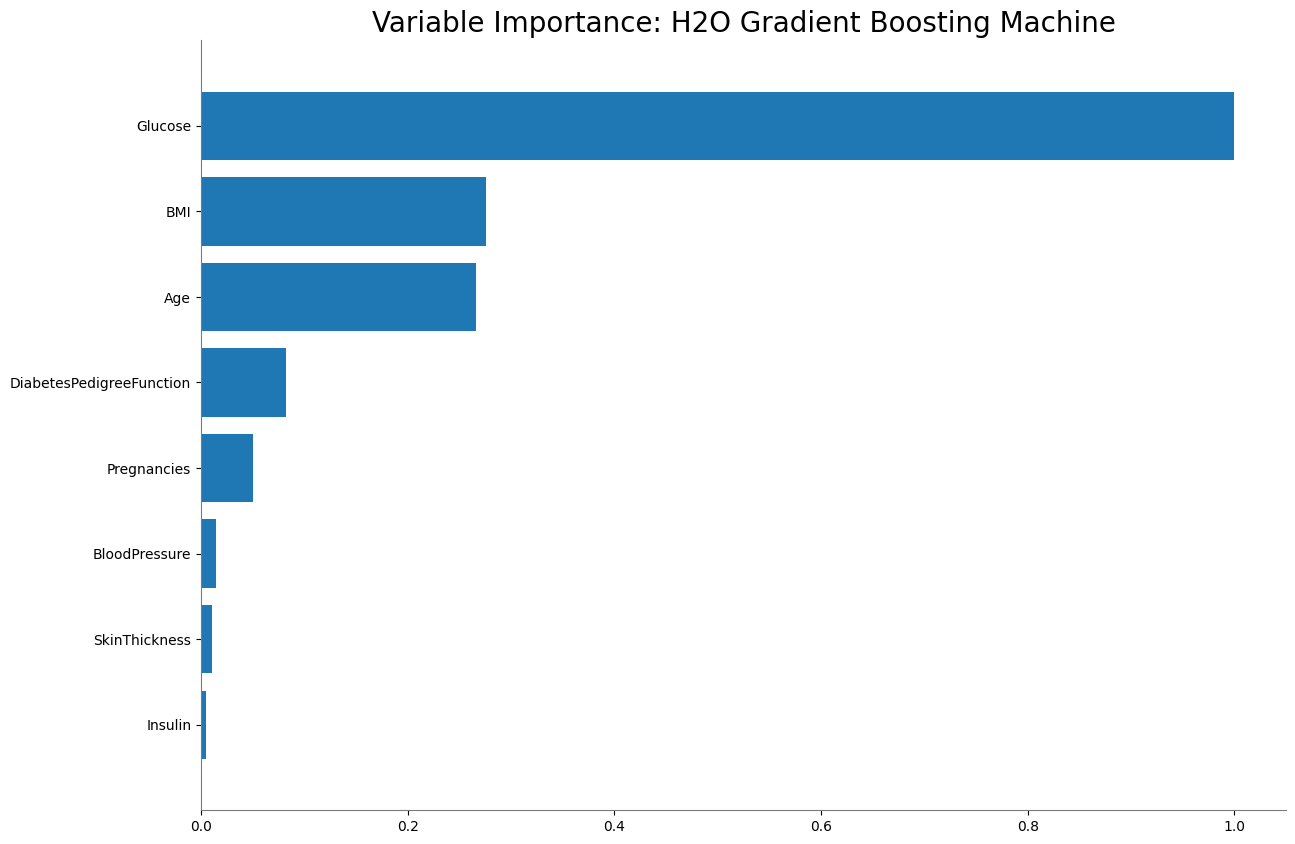

<Figure size 640x480 with 0 Axes>

In [25]:
# Plot varible importance
out_gbm.varimp_plot()

In [26]:
# Save the best model as a mojo
auto_ml.leader.download_mojo(path = "/content/drive/MyDrive/Machine Learning/Diabetes")

'/content/drive/MyDrive/Machine Learning/Diabetes'

In [27]:
# load the model
path = '/content/drive/MyDrive/Machine Learning/Diabetes'
imported_model = h2o.import_mojo(path)

generic Model Build progress: |██████████████████████████████████████████████████| (done) 100%


In [28]:
imported_model.predict(Diabetes_data_test)

generic prediction progress: |███████████████████████████████████████████████████| (done) 100%


predict,No,Yes
Yes,0.390289,0.609711
Yes,0.604221,0.395779
Yes,0.474408,0.525592
Yes,0.503545,0.496455
No,0.986251,0.0137493
Yes,0.623893,0.376107
No,0.723511,0.276489
Yes,0.530043,0.469957
No,0.754224,0.245776
Yes,0.611544,0.388456


In [29]:
Diabetes_data_test.shape

(83, 9)

In [30]:
input = [[10,168,74,0,0,38,0.537,34]]
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
input = h2o.H2OFrame(input, column_names = column_names)
print(input.shape)
predict = imported_model.predict(input)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
(1, 8)
generic prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [31]:
predict[0]

predict
Yes
